# Dog Adoption

In [ ]:
!pip install statsmodels
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 125.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 57.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Data Exploration and Cleaning

In [ ]:
# loading in dog description dataset

dog_desc = pd.read_csv('allDogDescriptions.csv')
dog_desc

,index,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description
0,0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,Dog,American Staffordshire Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Dog,Pit Bull Terrier,Mixed Breed,True,False,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Dog,Shepherd,NaN,False,False,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,Dog,German Shepherd Dog,NaN,False,False,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,NaN,False,False,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58175,58175,44605893,WY20,https://www.petfinder.com/dog/tren-44605893/wy...,Dog,Dog,Border Collie,NaN,False,False,...,adoptable,2019-05-03T14:23:49+0000,Lander,WY,82520,US,WY,2019-09-20,Dog,"Due to the small size of our volunteer base, w..."
58176,58176,44457061,WY24,https://www.petfinder.com/dog/harley-44457061/...,Dog,Dog,Australian Shepherd,Australian Cattle Dog / Blue Heeler,True,False,...,adoptable,2019-04-13T16:20:24+0000,Riverton,WY,82501,US,WY,2019-09-20,Dog,NaN
58177,58177,42865848,WY20,https://www.petfinder.com/dog/echo-42865848/wy...,Dog,Dog,Border Collie,NaN,False,False,...,adoptable,2018-09-27T04:18:56+0000,Glenrock,WY,82637,US,WY,2019-09-20,Dog,"Due to the small size of our volunteer base, w..."
58178,58178,42734734,WY24,https://www.petfinder.com/dog/simon-42734734/w...,Dog,Dog,Boxer,Mixed Breed,True,False,...,adoptable,2018-09-12T05:03:38+0000,Riverton,WY,82501,US,WY,2019-09-20,Dog,NaN


In [ ]:
# loading in dog travel dataset

dog_travel = pd.read_csv('dogTravel.csv')
dog_travel

,index,id,contact_city,contact_state,description,found,manual,remove,still_there
0,0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN
1,1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN
2,2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN
3,3,44475904,Saint Cloud,MN,~~Came in to the shelter as a transfer from an...,Adaptil,NaN,True,NaN
4,4,43877389,Pueblo,CO,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6189,6189,40492179,Fairmont,WV,Please contact Pet (information@pethelpersinc....,WV,NaN,True,NaN
6190,6190,45799729,Eagle Mountain,UT,Shiny is an approximately 4-6-year-old spayed ...,Wyoming,NaN,NaN,NaN
6191,6191,34276515,Newnan,GA,Yanni is a Male Great Pyrenees that we rescue...,Yazmin,NaN,True,NaN
6192,6192,44519341,Dayton,OH,Callie is a 14 year old Chihuahua whose owner ...,Young,Ohio,NaN,NaN


In [ ]:
# merging together both datasets into one for all dogs

all_dogs = dog_travel.merge(dog_desc, how = 'inner', on = 'id')
all_dogs

,index_x,id,contact_city_x,contact_state_x,description_x,found,manual,remove,still_there,index_y,...,status,posted,contact_city_y,contact_state_y,contact_zip,contact_country,stateQ,accessed,type.y,description_y
0,0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN,37734,...,adoptable,2019-04-22T18:39:09+0000,Anoka,MN,55303,US,MN,2019-09-20,Dog,Boris is a handsome mini schnauzer who made hi...
1,437,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN,37734,...,adoptable,2019-04-22T18:39:09+0000,Anoka,MN,55303,US,MN,2019-09-20,Dog,Boris is a handsome mini schnauzer who made hi...
2,1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN,24429,...,adoptable,2019-05-15T13:01:04+0000,Groveland,FL,34736,US,FL,2019-09-20,Dog,Duke is an almost 2 year old Potcake from Abac...
3,489,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Bahamas,NaN,NaN,NaN,24429,...,adoptable,2019-05-15T13:01:04+0000,Groveland,FL,34736,US,FL,2019-09-20,Dog,Duke is an almost 2 year old Potcake from Abac...
4,2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN,15863,...,adoptable,2019-09-16T02:13:36+0000,Adamstown,MD,21710,US,DC,2019-09-20,Dog,Zac Woof-ron is a heartthrob movie star lookin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,6176,38779404,Nazareth,PA,"A Reason To Believe Animal Rescue, Inc.\nhttp:...",WV,West Virginia,NaN,True,44690,...,adoptable,2017-07-16T11:27:47+0000,Nazareth,PA,18064,US,NJ,2019-09-20,Dog,"A Reason To Believe Animal Rescue, Inc.\nhttp:..."
6190,6177,38779405,Nazareth,PA,"A Reason To Believe Animal Rescue, Inc.\nhttp:...",WV,West Virginia,NaN,True,44691,...,adoptable,2017-07-16T11:27:47+0000,Nazareth,PA,18064,US,NJ,2019-09-20,Dog,"A Reason To Believe Animal Rescue, Inc.\nhttp:..."
6191,6190,45799729,Eagle Mountain,UT,Shiny is an approximately 4-6-year-old spayed ...,Wyoming,NaN,NaN,NaN,54277,...,adoptable,2019-08-30T19:19:42+0000,Eagle Mountain,UT,84005,US,UT,2019-09-20,Dog,Shiny is an approximately 4-6-year-old spayed ...
6192,6191,34276515,Newnan,GA,Yanni is a Male Great Pyrenees that we rescue...,Yazmin,NaN,True,NaN,28344,...,adoptable,2016-01-19T15:21:05+0000,Newnan,GA,30263,US,GA,2019-09-20,Dog,Yanni is a Male Great Pyrenees that we rescue...


In [ ]:
#checking for duplicate values
all_dogs['id'].value_counts()

44759409    11
44759410    11
45988387     7
45537987     7
45728583     7
            ..
45583580     1
45982945     1
45735142     1
44752522     1
45688831     1
Name: id, Length: 4115, dtype: int64

In [ ]:
# dropping duplicate id values

all_dogs = all_dogs.drop_duplicates(subset = ['id'])

In [ ]:
# Adoptable is a placeholder value, as all dogs in the set are adoptable.
# Any row with a value that is not 'adoptable' is faulty data, and will be removed.
all_dogs['status'].value_counts()

adoptable                   4112
2015-09-07T12:57:27+0000       1
2016-12-15T13:33:43+0000       1
2019-07-25T19:53:21+0000       1
Name: status, dtype: int64

In [ ]:
# removing irrelevant values from status, as all dogs are adoptable
all_dogs = all_dogs.drop(all_dogs[all_dogs['status'] != 'adoptable'].index)

In [ ]:
# checking the number of values for each breed in our data
all_dogs['breed_primary'].value_counts()

Labrador Retriever          675
Chihuahua                   308
Pit Bull Terrier            261
German Shepherd Dog         203
Hound                       185
                           ... 
Tosa Inu                      1
English Springer Spaniel      1
Miniature Poodle              1
Smooth Collie                 1
Eskimo Dog                    1
Name: breed_primary, Length: 153, dtype: int64

In [ ]:
#We remove duplicate/irrelevant columns for analysis
all_dogs.drop(['type.y', 'species', 'manual', 'contact_city_x', 'stateQ', \
'contact_city_y', 'org_id', 'contact_state_y', 'description_y', 'index_x', 'index_y', 'type.x', \
'accessed', 'status', 'breed_unknown', 'breed_mixed', 'url', 'declawed', 'name', \
'contact_zip', 'contact_country', 'found', 'still_there', 'posted'], axis=1, inplace=True)

In [ ]:
# filling nan values with "unknown" or False


values = {"env_children": False, "env_dogs": False, "env_cats": False, 'remove': False}
all_dogs = all_dogs.fillna(value=values)
all_dogs

,id,contact_state_x,description_x,remove,breed_primary,breed_secondary,color_primary,color_secondary,color_tertiary,age,sex,size,coat,fixed,house_trained,special_needs,shots_current,env_children,env_dogs,env_cats
0,44520267,MN,Boris is a handsome mini schnauzer who made hi...,False,Miniature Schnauzer,NaN,Black,White / Cream,NaN,Adult,Male,Small,Medium,True,False,True,True,False,True,True
2,44698509,FL,Duke is an almost 2 year old Potcake from Abac...,False,Labrador Retriever,German Shepherd Dog,NaN,NaN,NaN,Young,Male,Medium,NaN,True,True,False,False,False,True,True
4,45983838,MD,Zac Woof-ron is a heartthrob movie star lookin...,False,Australian Cattle Dog / Blue Heeler,NaN,Red / Chestnut / Orange,NaN,NaN,Young,Male,Medium,Short,True,True,False,True,False,True,False
5,44475904,MN,~~Came in to the shelter as a transfer from an...,True,American Staffordshire Terrier,Labrador Retriever,Brown / Chocolate,NaN,NaN,Adult,Male,Medium,NaN,True,False,False,False,False,False,False
6,43877389,CO,Palang is such a sweetheart. She loves her peo...,False,Shepherd,NaN,"Tricolor (Brown, Black, & White)",NaN,NaN,Adult,Female,Large,Long,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,38779404,PA,"A Reason To Believe Animal Rescue, Inc.\nhttp:...",False,Pointer,American Bulldog,NaN,NaN,NaN,Adult,Female,Medium,NaN,False,False,False,False,False,False,False
6190,38779405,PA,"A Reason To Believe Animal Rescue, Inc.\nhttp:...",False,Pointer,American Bulldog,NaN,NaN,NaN,Adult,Female,Medium,NaN,False,False,False,False,False,False,False
6191,45799729,UT,Shiny is an approximately 4-6-year-old spayed ...,False,Pit Bull Terrier,American Bulldog,NaN,NaN,NaN,Adult,Female,Small,NaN,True,True,False,False,False,False,False
6192,34276515,GA,Yanni is a Male Great Pyrenees that we rescue...,True,Great Pyrenees,NaN,White / Cream,NaN,NaN,Young,Male,Extra Large,Long,True,False,False,True,False,False,False


In [ ]:
# splitting into training and testing datsets

X = all_dogs[['breed_primary', 'breed_secondary', 
        'color_primary', 'color_secondary',
       'color_tertiary', 'age', 'sex', 'size', 'coat', 'fixed',
       'house_trained', 'special_needs', 'shots_current', 'env_children',
       'env_dogs', 'env_cats']]
X = pd.get_dummies(X, drop_first = True)
y = all_dogs['remove']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

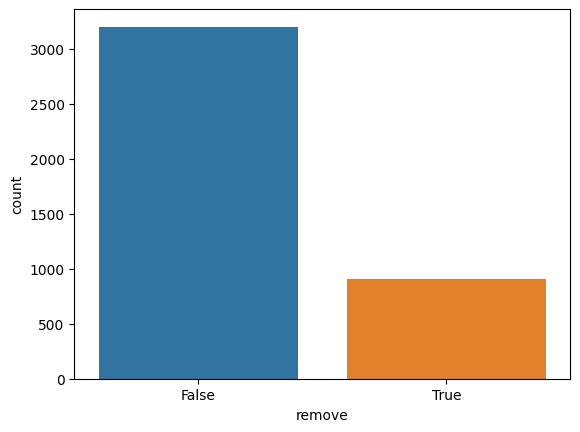

In [ ]:
#count of removed and not removed dogs

sns.countplot(x = y)
plt.show()

In [ ]:
# baseline model
print(y_test.value_counts())
notremoved = np.sum(y_test == False)
removed = np.sum(y_test == True)

baseline_acc = notremoved / (notremoved + removed)

print(f'Baseline Accuracy: {baseline_acc}')

False    1039
True      318
Name: remove, dtype: int64
Baseline Accuracy: 0.765659543109801


In [ ]:

# logistic regression

logreg_model = LogisticRegression(random_state=42)
result = logreg_model.fit(X_train, y_train)

#logit_model=sm.Logit(y,X.astype(float))
#result=logit_model.fit()
#print(result.summary())

#logreg_model = smf.logit(formula = "remove ~ fixed + house_trained + \
#special_needs + shots_current", data = logmodeltemp).fit()

# make predictions
y_pred = logreg_model.predict(X_test)
#binary = [1 if x>= 0.5 else 0 for x in predictions]
# calculate accuracy
log_acc = accuracy_score(y_test, y_pred)

print(f'LogReg Test Accuracy: {log_acc}')


LogReg Test Accuracy: 0.7693441414885778


In [ ]:
cm = confusion_matrix(y_test, y_pred)
tpr = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
fpr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
tnr = cm.ravel()[0]/(cm.ravel()[0]+cm.ravel()[1])
fnr = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print(f'LogReg Confusion Matrix: \n {cm}')
print(f'True Positive Rate: {tpr}')
print(f'False Positive Rate: {fpr}')
print(f'True Negative Rate: {tnr}')
print(f'False Negative Rate: {fnr}')

LogReg Confusion Matrix: 
 [[992  47]
 [266  52]]
True Positive Rate: 0.16352201257861634
False Positive Rate: 0.04523580365736285
True Negative Rate: 0.9547641963426372
False Negative Rate: 0.04523580365736285


In [ ]:
# auc 
fpr, tpr, _ = roc_curve(y_test, y_pred)
aucscore = auc(fpr, tpr)
print(f'LogReg AUC: {aucscore}')

LogReg AUC: 0.5591431044606268


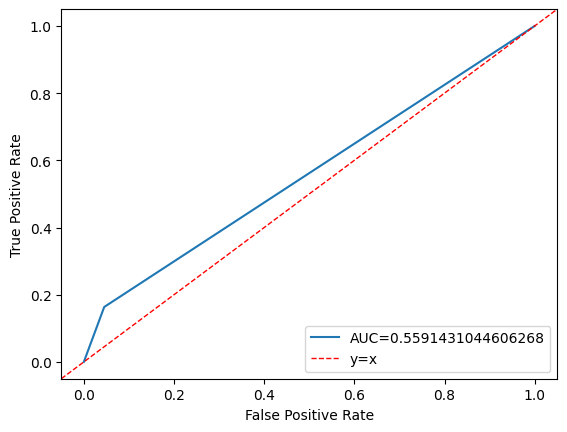

In [ ]:
#create ROC curve
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.axline((0, 0), (1, 1), linewidth=1, color='r', ls = '--', label = 'y=x')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# decision tree/CART 

clf = DecisionTreeClassifier(random_state = 42) 
clf = clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
dec_acc = accuracy_score(y_test, y_pred_clf)
print (f'Decision Tree Accuracy: {dec_acc}')

Decision Tree Accuracy: 0.7715549005158437


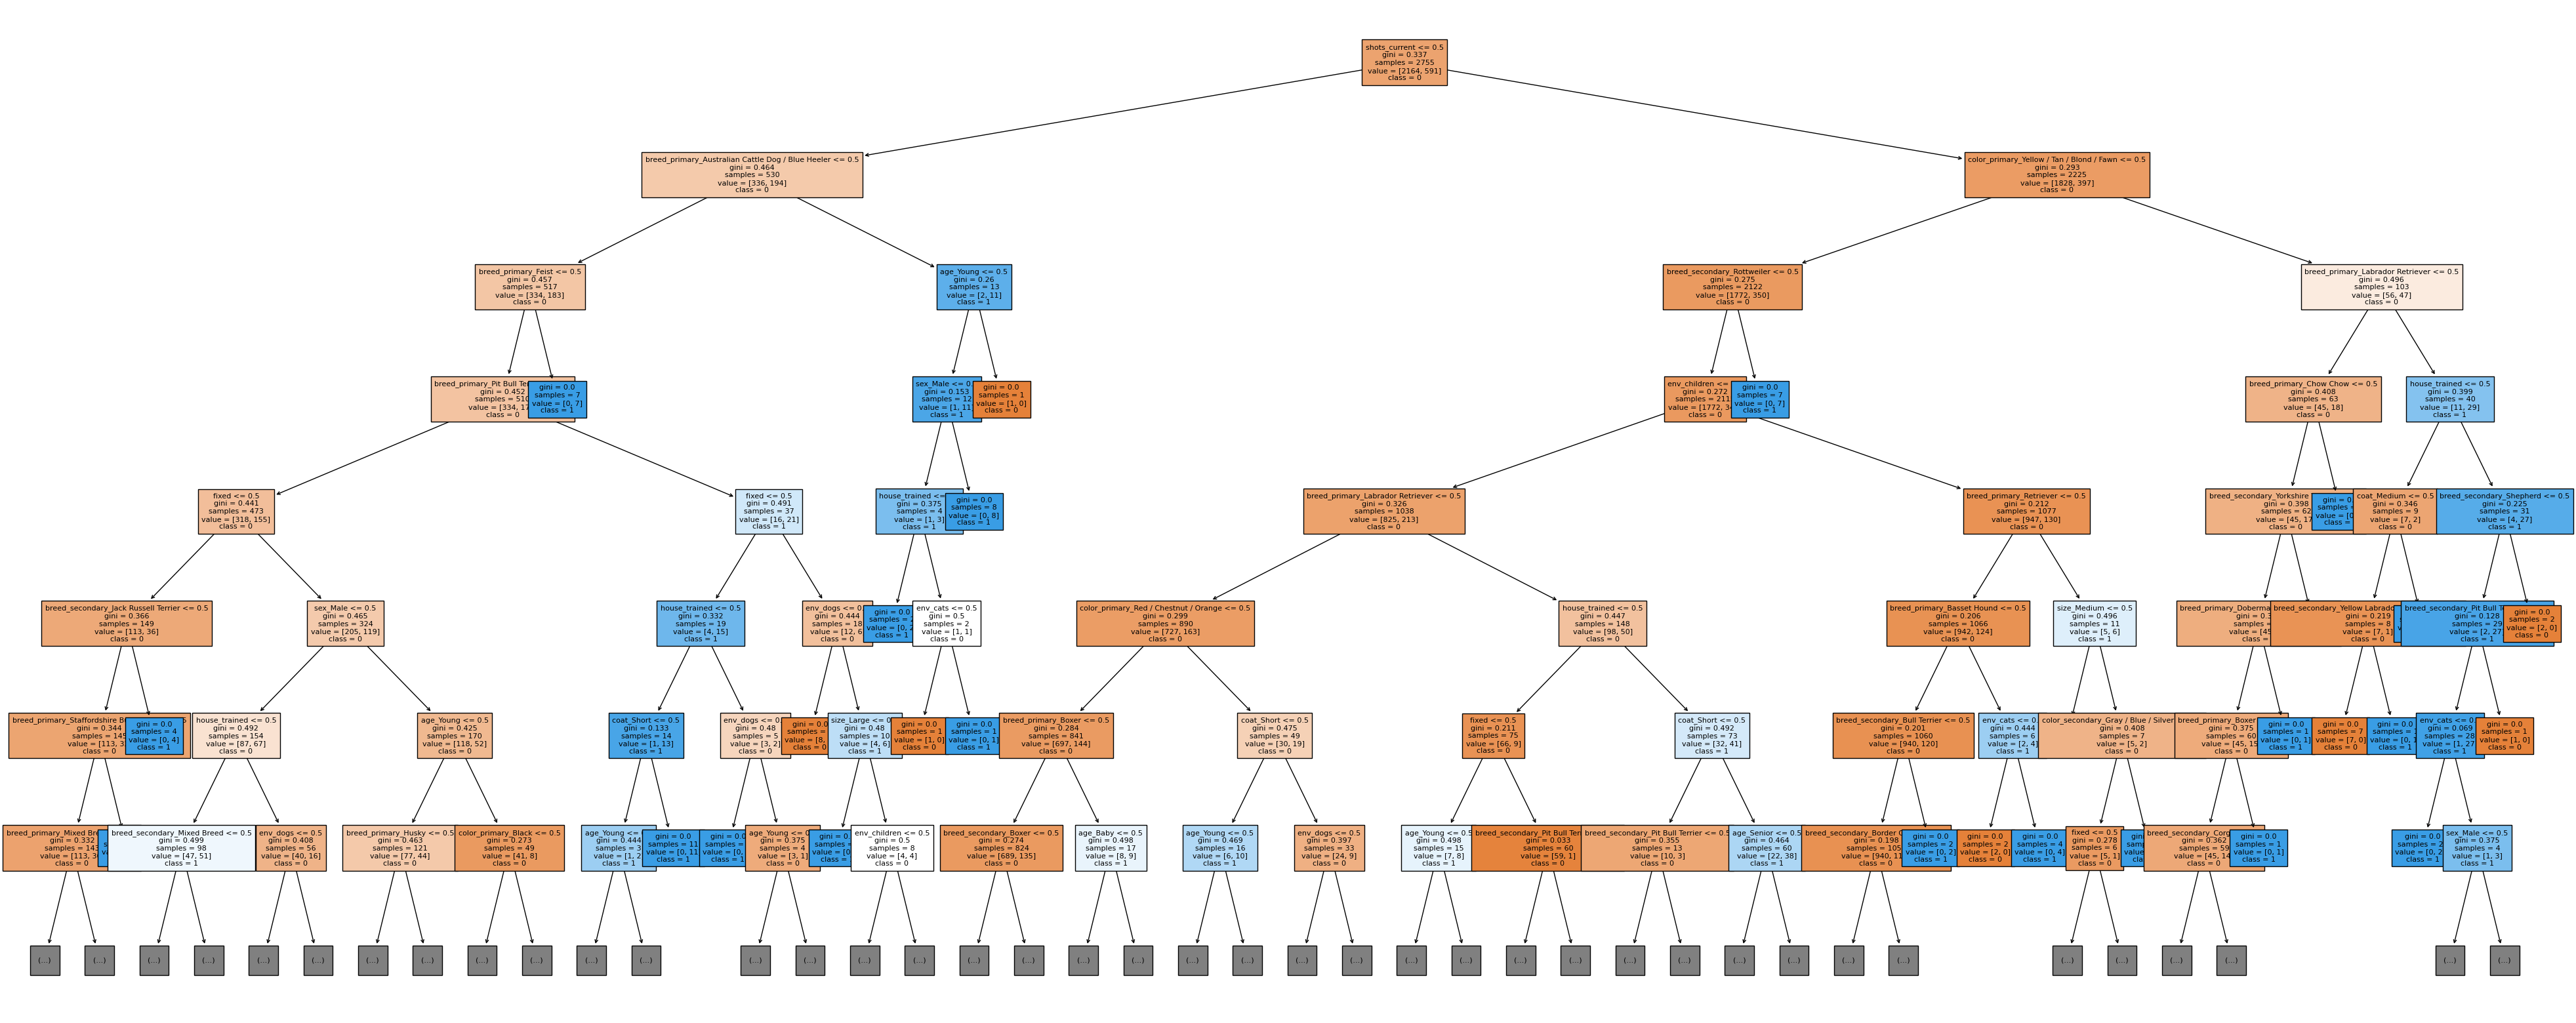

In [ ]:
# decision tree with CART visualization

clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
fig = plt.figure(figsize=(50,20))
tree.plot_tree(clf, 
          max_depth = 7,
          feature_names=X_train.columns, 
          class_names=['not_adopted','adopted'], 
          filled=True,
          impurity=True,
          fontsize=8)

fig.savefig("cart_dec_tree.png")

In [ ]:
# decision trees with cross validation

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=42)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10, error_score ='raise').fit(X_train, y_train)
y_pred = dtc_cv.predict(X_test)

dec_tree_acc = accuracy_score(y_test, y_pred)
print (f'Decision Tree with CV Accuracy: {dec_tree_acc}')

Decision Tree with CV Accuracy: 0.7811348563006633


Node count = 23


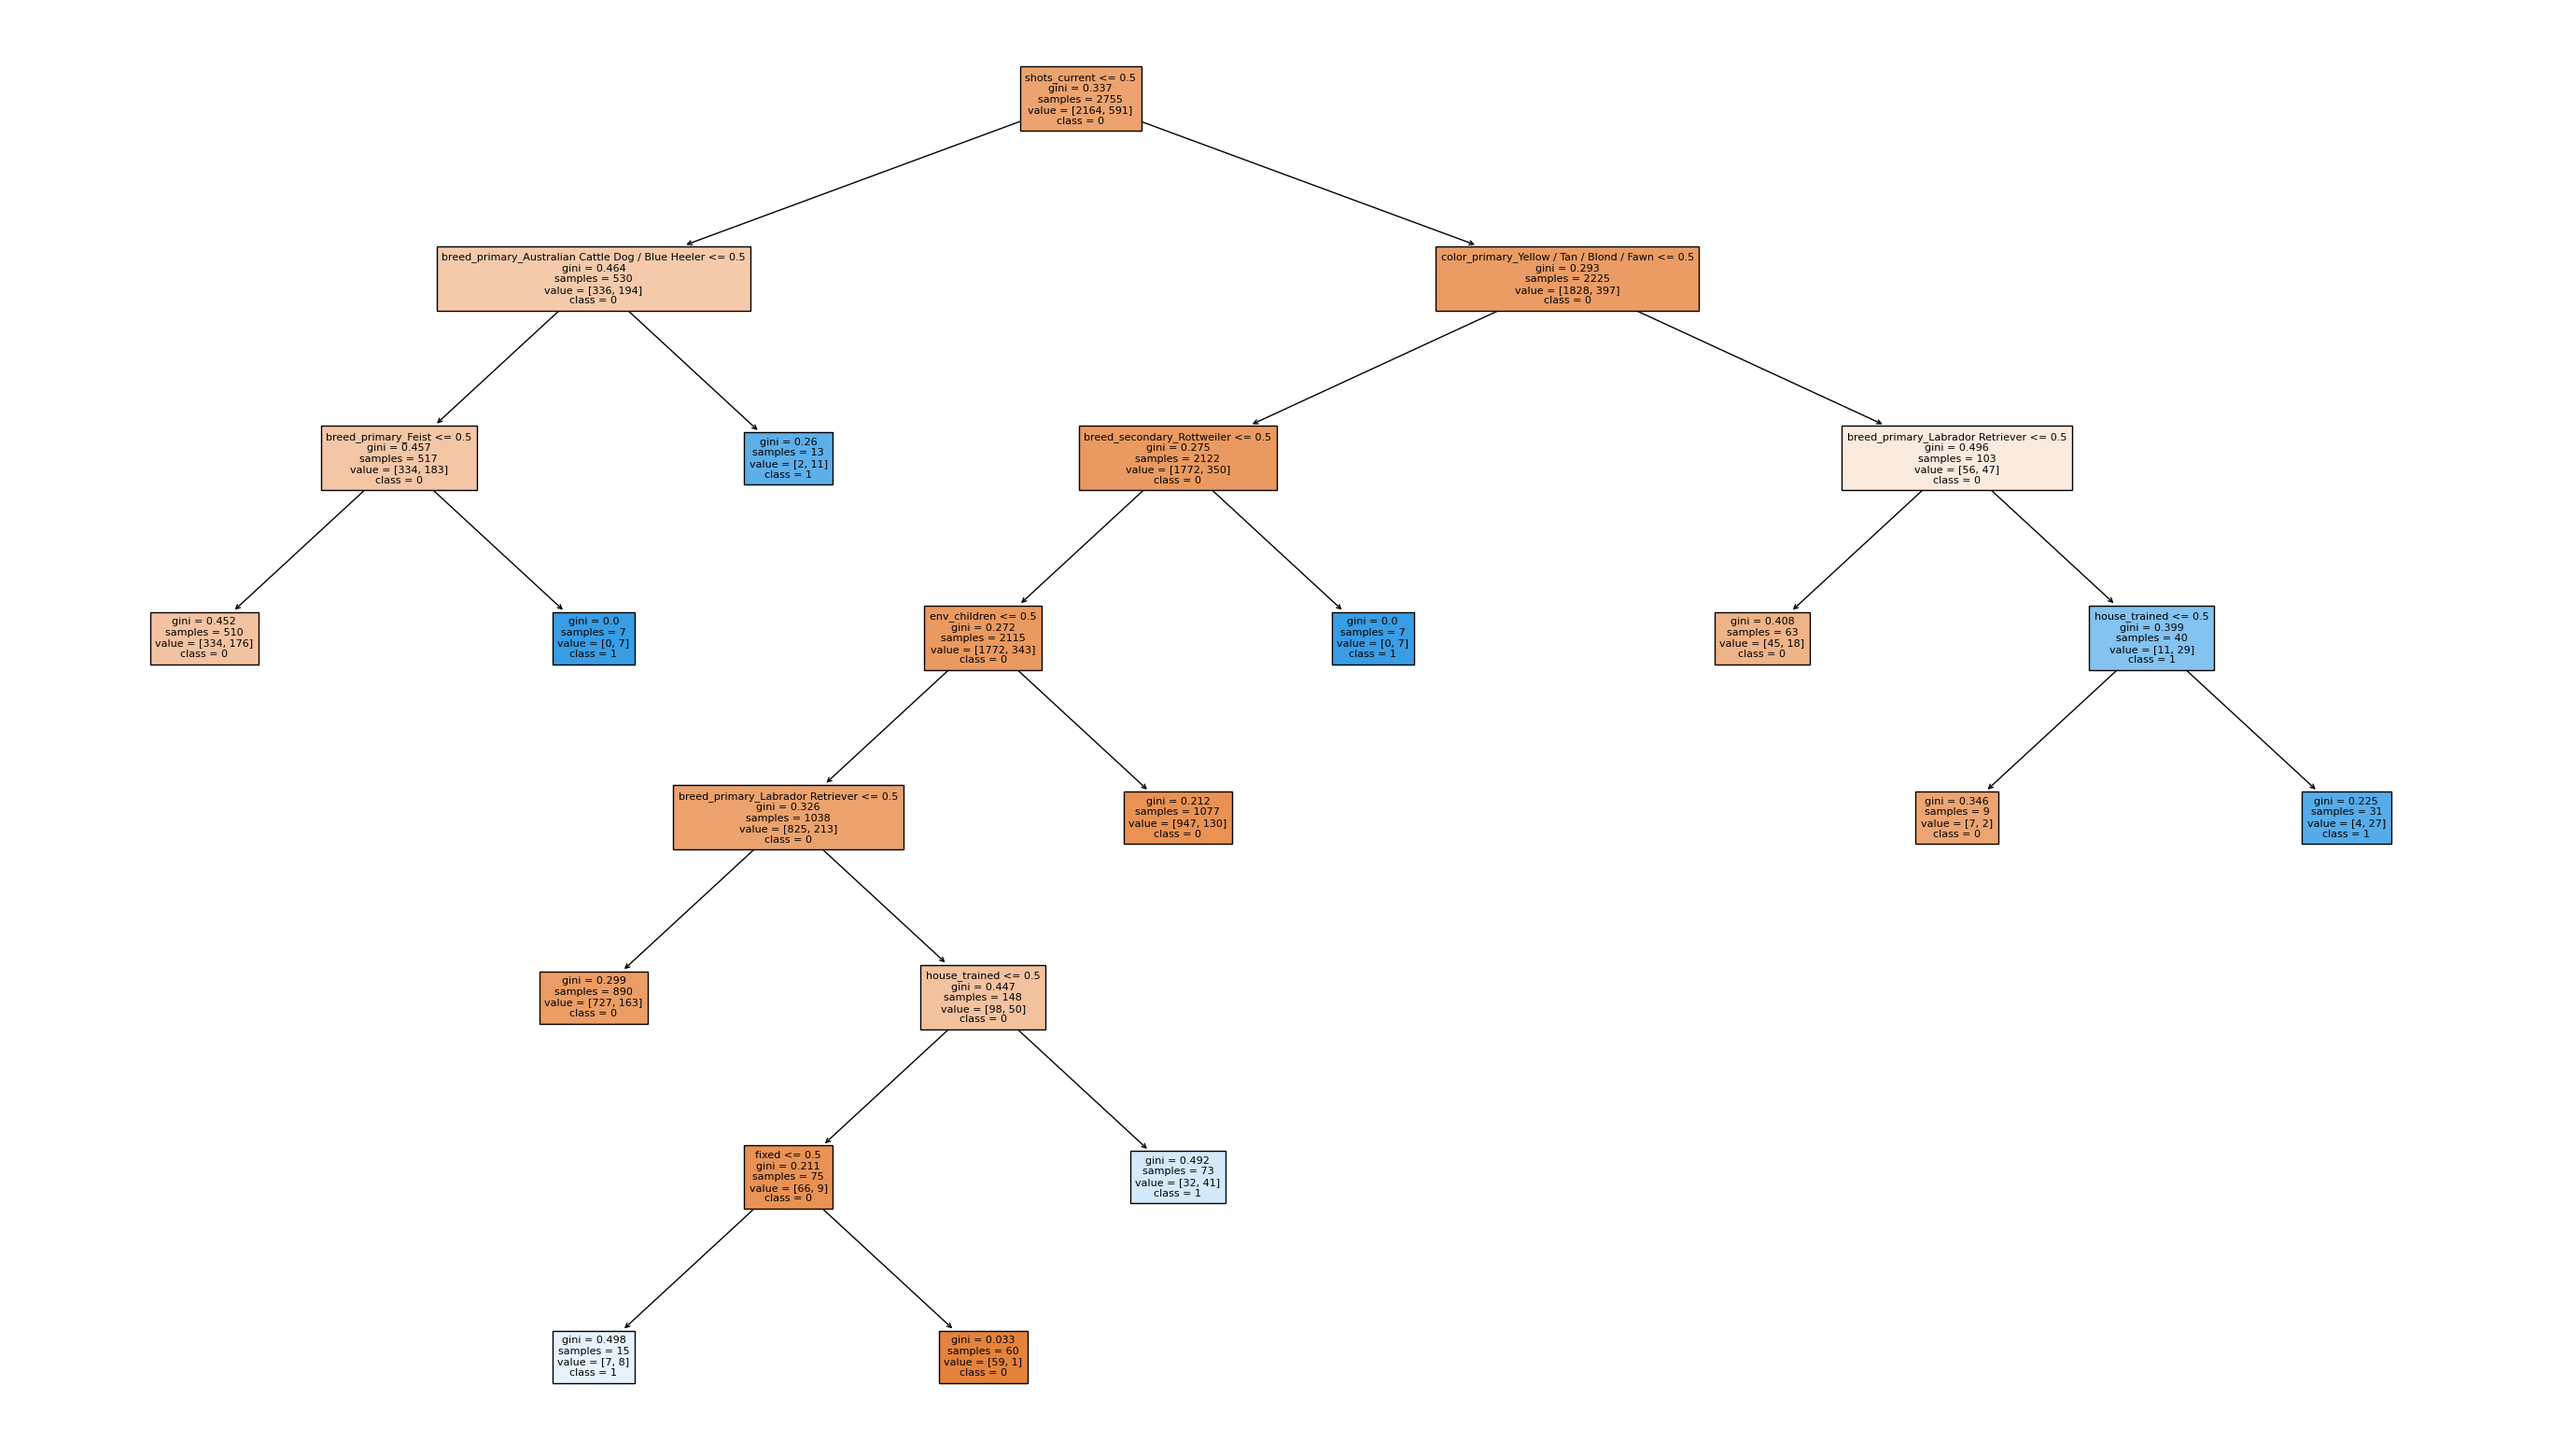

In [ ]:
# decision tree with cv accuracy visualization

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
fig = plt.figure(figsize=(35, 20))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['not_adopted','adopted'], 
          filled=True,
          impurity=True,
          fontsize=8) 
plt.show()

fig.savefig("cv_acc_dec_tree.png")

In [ ]:
values = {
'Baseline Model':[baseline_acc],
'Logistic Regression':[log_acc],
'CART':[dec_acc],
'Cross Validated CART':[dec_tree_acc],
}
table = pd.DataFrame(values, index = ['Accuracy'])
table


,Baseline Model,Logistic Regression,CART,Cross Validated CART
Accuracy,0.76566,0.769344,0.771555,0.781135


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=627dc21a-efc9-4683-a4ed-f9ab479e17f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>